### Расследование предвзятых рейтингов фильмов на Fandango
Прошлый анализ 2015 года, проведенный Уолтом Хикки, показал, что рейтинговая система Fandango была предвзятой в том, что рейтинги фильмов были округлены и, таким образом, завышены, чтобы быть выше, чем они были на самом деле.

Будут проанализированы более поздние данные рейтинга фильмов, чтобы определить, произошли ли какие-либо изменения в рейтинговой системе Fandango после анализа Хики.

**Что касается данных:**
<br>Будут проанализированы два отдельных набора данных. Первый набор данных будет содержать данные рейтинга фильмов, которые Хикки проанализировал в 2015 году. Второй набор данных будет содержать данные рейтинга фильмов для популярных фильмов за 2016 и 2017 годы.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
cm = sns.light_palette("pink", as_cmap=True)

# Данные за 2015 год и ранее
before = pd.read_csv('data/fandango_score_comparison.csv')

# Данные после 2015
after = pd.read_csv('data/movie_ratings_16_17.csv')

In [2]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Во-первых, выделим данные, относящиеся к Fandango, так как мы сосредоточимся на том, изменилась ли их рейтинговая система.

In [4]:
# Fandango data
fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [5]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


После изучения выборки "before" обнаружилось, что во время выборки были отобраны только фильмы 2015 года с не менее чем 30 отзывами фанатов на Fandango. Это указывает на то, что этот набор данных не является полностью репрезентативным для всего интересующего нас населения, поскольку фильмы с менее чем 30 обзорами были исключены из выборки населения.

### Изменение цели анализа:
Из-за недостатков, связанных с выборкой, описанной ранее, измен. цель нашего анализа на определение того, есть ли какая-либо разница в рейтингах фильмов Fandango в 2015 году по сравнению с рейтингами фильмов Fandango в 2016 году. Это может намекнуть на то, изменилась ли рейтинговая система Fandango после 2015 года (наша первоначальная цель).

Изменение цели гораздо проще и осуществимей в отличие от сбора более релевантных данных.

In [7]:
# Извлечени года выпуска с помощью регулярных выражений
fandango_before['year'] = fandango_before['FILM'].str.extract(r"\(([0-9]+)\)", expand=False)
fandango_before['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [8]:
fandango_2015 = fandango_before[fandango_before['year']=='2015'].copy()
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [9]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [10]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
fandango_2016 = fandango_after[fandango_after['year']==2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [12]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


Сравнение распределений по годам
Чтобы визуализировать распределение рейтингов фильмов Fandango между 2015 и 2016 годами, можно наложить график оценки плотности ядра (kde) рейтингов за каждый год. Визуализация данных позволяет легко сравнивать рейтинги фильмов по годам.

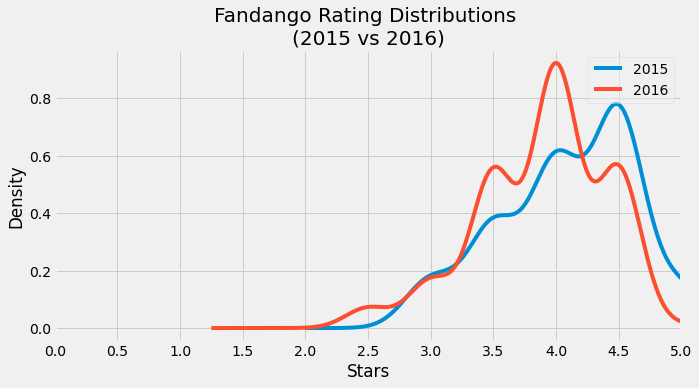

In [13]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(figsize=(10,5), label='2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

plt.legend(fancybox=True, framealpha=0.5, loc='upper right')
plt.title('Fandango Rating Distributions \n(2015 vs 2016)', fontsize=20)
plt.xlabel('Stars')
plt.xlim(0,5)  # StarRatings range [0-5]
plt.xticks(np.arange(0,5.1,.5))
plt.show()

Из графиков плотности ядра видно, что оба распределения сильно смещены влево. Участок 2016 года немного смещен влево от участка 2015 года. Этот небольшой сдвиг говорит о том, что действительно произошло изменение между звездными рейтингами Фанданго с 2015-2016 годов. В целом, фильмы в 2016 году, по-видимому, оцениваются ниже, чем фильмы в 2015 году.

### Сравнение Относительных Частот
С чисто числовой точки зрения можно рассчитать процентное распределение рейтингов для каждого года.

In [14]:
print('2015 \n-----------')
star_fandango_2015 = fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100
star_fandango_2015.to_frame().style.background_gradient(cmap=cm)

2015 
-----------


,Fandango_Stars
3.0,8.52713
3.5,17.8295
4.0,28.6822
4.5,37.9845
5.0,6.97674


In [15]:
print('\n 2016 \n-----------')
star_fandango_2016 = fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100
star_fandango_2016.to_frame().style.background_gradient(cmap=cm)


 2016 
-----------


,fandango
2.5,3.14136
3.0,7.32984
3.5,24.0838
4.0,40.3141
4.5,24.6073
5.0,0.52356


Наблюдая за отдельными присвоенными звездными рейтингами, мы обнаруживаем, что значительно большая часть рейтингов была 4,5 звезды и выше в 2015 году по сравнению с 2016 годом. Кроме того, в 2016 году больший процент рейтингов составлял 3,5 звезды и ниже.

### Визуализация направления изменений
Чтобы еще больше подтвердить утверждение о том, что фильмы в 2016 году были оценены ниже по сравнению с фильмами в 2015 году Fandango, можно рассчитать среднюю сводную статистику рейтингов и сравнить ее между годами.

In [16]:
mean_2015   = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015   = fandango_2015['Fandango_Stars'].mode()[0]

print('2015 \n-----------')
print('mean: \t'  + str(mean_2015.round(3)))
print('median:\t' + str(median_2015))
print('mode: \t'  + str(mode_2015))

2015 
-----------
mean: 	4.085
median:	4.0
mode: 	4.5


In [17]:
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

print('2016 \n-----------')
print('mean: \t' + str(mean_2016.round(3)))
print('median:\t' + str(median_2016))
print('mode: \t' + str(mode_2016))

2016 
-----------
mean: 	3.887
median:	4.0
mode: 	4.0


In [18]:
stats = pd.DataFrame()
stats['2015'] = [mean_2015, median_2015, mode_2015]
stats['2016'] = [mean_2016, median_2016, mode_2016]
stats.index   = ['mean','median','mode']
stats.reset_index(inplace=True)
stats

,index,2015,2016
0,mean,4.085271,3.887435
1,median,4.000000,4.000000
2,mode,4.500000,4.000000


In [19]:
stats_melt = pd.melt(stats, id_vars=['index'], 
                     value_vars=['2015','2016'], var_name="Year", value_name="Stars")
stats_melt

,index,Year,Stars
0,mean,2015,4.085271
1,median,2015,4.000000
2,mode,2015,4.500000
3,mean,2016,3.887435
4,median,2016,4.000000
5,mode,2016,4.000000


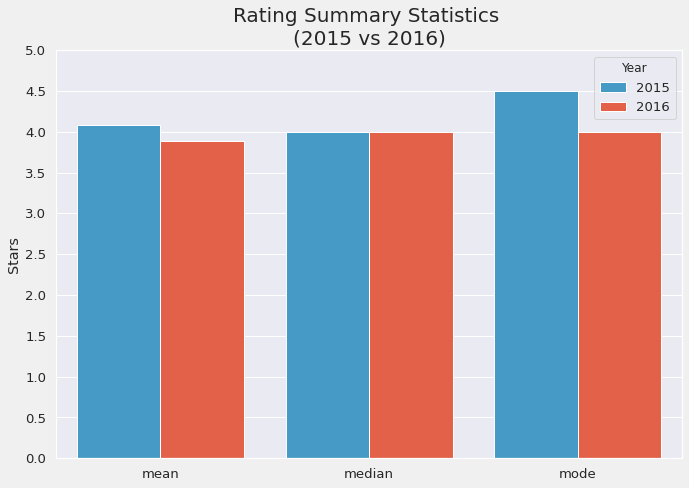

In [20]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Colour Palette
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set(font_scale=1.2)
sns.set_palette(five_thirty_eight)

ax = sns.barplot(x="index", y='Stars', hue='Year', data=stats_melt)
ax.set(xlabel='', ylabel='Stars', ylim=(0,5), yticks=np.arange(0, 5.1, .5))
ax.axes.set_title('Rating Summary Statistics \n(2015 vs 2016)', fontsize=20);

Сводная статистика показывает, что рейтинги Fandango были выше в 2015 году по сравнению с 2016 годом, основываясь на незначительных изменениях среднего и модального показателей. Это согласуется с нашими предыдущими наблюдениями на графиках плотности, созданных ранее.

Анализ полученных данных показывает, что на самом деле существует небольшая разница между рейтингами Fandango для популярных фильмов в 2015 году и рейтингами  в 2016 году. В среднем фильмы, выпущенные в 2016 году, были оценены на Fandango ниже, чем те, которые были выпущены в 2015 году. Небольшая разница, возможно, объясняется тем, что Fandango зафиксировала свою предвзятую рейтинговую систему после публикации анализа Хики в 2015 году.